---
title: 6.9 Aircraft Longitudinal Dynamics Control
subject: Dynamics
subtitle: 
short_title: 6.9 Aircraft Longitudinal Dynamics Control
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: Clutering, K-Means
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/05_Ch_6_Eigenvalues_and_Eigenvectors/079-Longitudinal_Dynamics.ipynb)

## Learning Objectives

By the end of this page, you should know:
- how to check the eigenvalues for controller in feedback with a dynamical systems
- undertand the practical implications of positive and negative eigenvalues in the matrix describing a linear ordinary differential equation

## Aircraft Longitudinal Dynamics
A passenger aircraft spends most of the flight near a constant speed and altitude. However, during the course of the flight, wind knocks the aircraft away from its desired operating condition. To return to the desired operating condition, the aircraft can adjust its *thrust*, which is a force in the direction that the airplane is pointing. The aircraft also has two flaps on the tail called *elevators* which can be adjusted to control the pitch of the plane, illustrated below. 
```{image} Aileron_pitch.gif
:alt: He divided by zero
:width: 400px
:align: center
```

The system which modifies the thrust and elevevator angles to steer the aircraft back to the desired operating condition is called an automatic control system. The control system should quickly bring the aircraft to the desired speed and altitude, but avoid making the passengers feel like they are on a roller coaster. 

We will focus on the longitudinal dynamics, which consider only the pitch axis of the airplane (as in the figure below) and ignores the roll and yaw axes. 

 ```{image} Yaw_Axis_Corrected.svg
:alt: pitch roll yaw
:width: 400px
:align: center
```

The longitudinal aircraft dynamics can be described in terms of the body axis of the aircraft relative to horizontal, as depicted in the below diagram.

 ```{image} body_axis.png
:alt: He divided by zero
:width: 800px
:align: center
```
We define several variables describing the state of the aircraft. 
* $u$: velocity of the aircraft along the body axis.
* $v$: velocity of the aircraft perpendicular to the body axis (down is positive)
* $\theta$: angle between the body axis and horizontal (pitch, up is positive)
* $q = \dot \theta$: the angular velocity of the aircraft (rate of pitch)
* $h$: the altitude of the aircraft

Let the desired values of these variables be denoted by $u_{\mathsf{des}}$, $v_{\mathsf{des}}$, $\theta_{\mathsf{des}}$, $q_{\mathsf{des}}$ and $h_{\mathsf{des}}$, respectively. Additionally, let $\delta_t$ denote the deviation of the thurst from its nominal value, and $\delta_e$ denote the deviation of the elevator angle from its nominal value. 


We will consider the dynamics of a Boeing 747  (see [https://see.stanford.edu/materials/lsoeldsee263/14-aircraft.pdf]).  The longintudinal dynamics of a Boeing 747 flying at 40000 feet are approximated by the following linear ordinary differential equation: 
$$\begin{bmatrix} \dot u \\ \dot v \\ \dot \theta \\ \dot q \\ \dot h \end{bmatrix} = A \begin{bmatrix} u - u_{\mathsf{des}} \\ v - v_{\mathsf{des}} \\ \theta  - \theta_{\mathsf{des}}\\ q - q_{\mathsf{des}} \\ h - h_{\mathsf{des}} \end{bmatrix}  + B \begin{bmatrix} \delta_e \\ \delta_t \end{bmatrix},$$ 

where 
$$ A =   \begin{bmatrix}
-0.003 & 0.04 & 0 & -0.32  & 0 \\
-0.07 & -0.32 & 7.74 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0.020 & -0.10   & -0.43 & 0 & 0 \\
0 & -1 & 7.74 & 0 & 0 
\end{bmatrix} \textrm{ and } B = \begin{bmatrix}
0.01 & 1 \\
-0.18 & -0.04 \\
0 & 0 \\
-1.16 & 0.6 \\
0 & 0 
\end{bmatrix}. $$
The units here are given by feet, seconds, and radians. 


## Feedback Control
In order to steer the plane back to its desired operating condition, the values for the control variables $\delta_e$ and $\delta_t$ should be chosen according to the current deviation of the state variables of the aircraft from their desired values. This is known as *feedback control*, because we are feeding our current measurements of the deviation variables $u$, $v$, $\theta$, $q$, and $h$ into the control system which influences the value of these measurements in the future. We will select the control variables according to a linear function of the error variables as 
$$ \begin{bmatrix} \delta_e \\ \delta_t \end{bmatrix} = K \begin{bmatrix}  u- u_{\mathsf{des}} \\ v - v_{\mathsf{des}} \\ \theta - \theta_{\mathsf{des}} \\ q - q_{\mathsf{des}} \\  h - h_{\mathsf{des}} \end{bmatrix}, $$
where $K$ is called our *feedback gain*. 

With the feedback controller defined above, the dynamics of the aircraft evolve as follows
\begin{equation}\label{eq:ODE} \begin{bmatrix} \dot u \\ \dot v \\ \dot \theta \\ \dot q \\ \dot h \end{bmatrix} = (A + B K)\begin{bmatrix}  u- u_{\mathsf{des}} \\ v - v_{\mathsf{des}} \\ \theta - \theta_{\mathsf{des}} \\ q - q_{\mathsf{des}} \\  h - h_{\mathsf{des}} \end{bmatrix}.\end{equation}

The study of the design of $K$ is pursued further in courses on linear control systems, e.g. ESE 5000. Here, we will propose several designs, and study the evolution of the system under these designs. 

First we will consider the simple controller defined by the feedback gain $K = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & -1
\end{bmatrix}$.

We saw in section 6.8 how to express the solution of an ODE in terms of its eigenvalues and eigenvectors. In particular, as long as the matrix $A + BK$ is diagonalizable, we may write $$A + BK = V D V^{-1},$$ with $$D = \mathsf{diag}(\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5)  \textrm{ and } V = \begin{bmatrix} \mathbf v_1 &  \mathbf v_2 & \mathbf v_3 & \mathbf v_4 & \mathbf v_5\end{bmatrix}.$$ Then the solution to [](#eq:ODE) from some initial condition $$\mathbf x_0 = \begin{bmatrix} u(0) - u_{\mathsf{des}} \\ v(0) - v_{\mathsf{des}} \\ \theta(0)  - \theta_{\mathsf{des}}\\ q(0) - q_{\mathsf{des}} \\ h(0) - h_{\mathsf{des}} \end{bmatrix}$$ is given by 
$$\begin{bmatrix} u(t) - u_{\mathsf{des}} \\ v(t) - v_{\mathsf{des}} \\ \theta(t)  - \theta_{\mathsf{des}}\\ q(t) - q_{\mathsf{des}} \\ h(t) - h_{\mathsf{des}} \end{bmatrix} = \sum_{i=1}^5 c_i e^{\lambda_i t} \mathbf{v}_i \textrm{  where  } \mathbf{c} = \begin{bmatrix} c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \end{bmatrix} = V^{-1} \mathbf{x}_0.$$

Let's compute the eigendecomposition of $A+BK$ for our first candidate $K$. 

In [2]:
import numpy as np

# Define matrix A
A = np.array([
    [-0.003, 0.039,  -0.322, 0, 0],
    [-0.065, -0.319, 0, 7.74, 0],
    [0, 0, 0, 1, 0],
    [0.020, -0.101, 0, -0.429, 0],
    [0, -1, 7.74, 0, 0]
])

# Define matrix B
B = np.array([
    [0.01, 1],
    [-0.18, -0.04],
    [0, 0],
    [-1.16, 0.6],
    [0, 0]
])

#Define matrix K 
K = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, -1]
])

D, V = np.linalg.eig(A + B@K)
print(D)
print(V)

[-2.24938654  1.28271453  0.857855   -0.06843549 -0.6137475 ]
[[-0.37327621  0.48070321 -0.42999545  0.97266764 -0.25811312]
 [ 0.89355114  0.82478631 -0.78631041 -0.19207838  0.75018395]
 [ 0.09854802  0.1387501  -0.14590538 -0.02368195  0.04886476]
 [-0.22167258  0.17797678 -0.12516566  0.00162069 -0.02999062]
 [ 0.05814452  0.19422833 -0.39983125 -0.12829687  0.60606473]]


Now, we will use the eigendecomposition computed above to simulate the response of our aircraft from a position where the altitude is 50 feet higher than desired. This is captured by defining the state variable at time zero as 
$$\mathbf x_0 = \begin{bmatrix} u(0) - u_{\mathsf{des}} \\ v(0) - v_{\mathsf{des}} \\ \theta(0)  - \theta_{\mathsf{des}}\\ q(0) - q_{\mathsf{des}} \\ h(0) - h_{\mathsf{des}} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 50 \end{bmatrix}.$$

Text(0, 0.5, 'altitude error ($h(t) - h_{des}$) ')

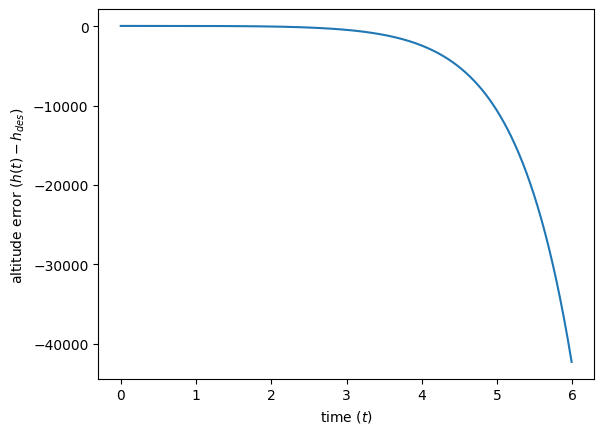

In [3]:
#simulate the response. 
x_0  = np.array([0, 0, 0, 0, 50])
def simulate_system(x_0, evaluation_timesteps, D, V):
    response = np.zeros((len(evaluation_timesteps), len(x_0)))
    for i, t in enumerate(evaluation_timesteps):
        response[i] = V@np.diag(np.exp(t*D))@np.linalg.inv(V)@x_0
    return response

evaluation_timesteps = np.arange(0, 6, 0.01)
system_response = simulate_system(x_0, evaluation_timesteps, D, V)

import matplotlib.pyplot as plt
plt.plot(evaluation_timesteps, system_response[:,-1])
plt.xlabel('time ($t$)')
plt.ylabel(r'altitude error ($h(t) - h_{des}$) ')

Well that isn't good. We just nosedove 40000 feet in 6 seconds when our original altitude was 40000 feet...

What went wrong? Let's recall the eigenvalues and eigenvectors of our matrix $A+BK$:
* $\lambda_1 = -2.25$
* $\lambda_2 = 1.28$
* $\lambda_3 = .86$
* $\lambda_4 = -.07$
* $\lambda_5 = -.61$


## Stable Feedback Control
The response of the system at time $t$ is given by $\sum_{i=1}^5 c_i e^{\lambda_i t} \mathbf v_i$, where $\mathbf{c} = V^{-1} \mathbf x_0$. Three of the eigenvalues are negative, and thus their contribution to the sum diminishes as $t$ increases. However, $\lambda_2 > 0$ and $\lambda_3 >0$. Therefore, the coefficients $c_2 e^{\lambda_2 t}$ and $c_3 e^{\lambda_3 t}$ increases as $t$ increases. As a result, the small initial deviation from the desired operating point gets amplified, and causes the plane to crash. Let's try another control design:

$$ K = \begin{bmatrix} -.75 & 1.4 & -17 & .75 & -.2 \\ -1.5 & 3 & -40 & -5 & -.4 \end{bmatrix}$$

In [4]:
#Define matrix K 
K = np.array([
   [-.75, 1.4, -17, .75, -.2], 
    [-1.5, 3., -40, -5, -.4]
])

D, V = np.linalg.eig(A + B@K)

print('eigenvalues:', D)

eigenvalues: [-3.12172222 -1.91117758 -0.0483513  -0.36782678 -1.05142212]


Ok! Now all our eigenvalues are negative. Let's see how the aircraft's altitude evolves now that our control system results in negative eigenvalues. 

Text(0, 0.5, 'altitude error ($h(t) - h_{des}$) ')

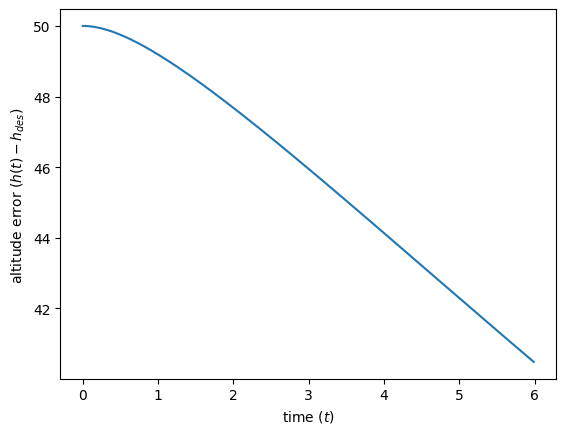

In [5]:
system_response = simulate_system(x_0, evaluation_timesteps, D, V)

plt.plot(evaluation_timesteps, system_response[:,-1])
plt.xlabel('time ($t$)')
plt.ylabel(r'altitude error ($h(t) - h_{des}$) ')

At least our plane isn't crashing now. Let's simulate for a bit longer. 

Text(0, 0.5, 'altitude error ($h(t) - h_{des}$) ')

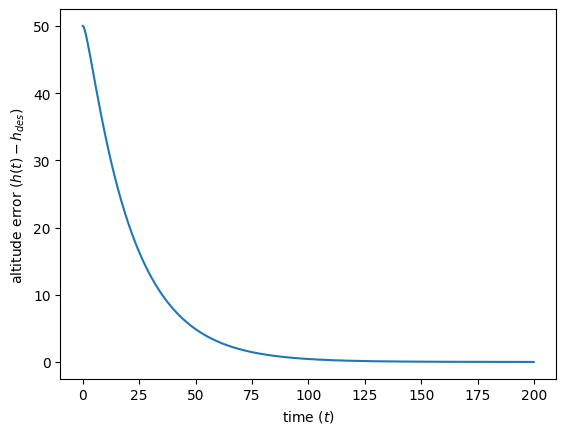

In [6]:
evaluation_timesteps = np.arange(0,200, 0.1)
system_response = simulate_system(x_0, evaluation_timesteps, D, V)

plt.plot(evaluation_timesteps, system_response[:,-1])
plt.xlabel('time ($t$)')
plt.ylabel(r'altitude error ($h(t) - h_{des}$) ')

## Linear ODEs with imaginary Eigenvalues 
Our altitude eventually appraoches the desired altitude. But it takes almost two minutes. Let's try one more gain and see if we get a quicker response. 
$$ K = \begin{bmatrix} -0.5 & -1 & 17 & 3 & 0.7 \\ -0.8 & 1.4 & -15 &  -1.6 & -0.7\end{bmatrix}$$

In [7]:
K = np.array([
    [ -0.5,  -1.0,  17,   3,   0.7],
    [ -0.8,  1.4, -15,  -1.6,  -0.7]
])

D, V = np.linalg.eig(A + B@K)

print('eigenvalues:', D)

eigenvalues: [-2.14691919+2.77540661j -2.14691919-2.77540661j -0.86026437+0.j
 -0.35894862+0.37528344j -0.35894862-0.37528344j]


Now some of our eigenvalues are complex. While we have seen complex eigenvalues, we have not discussed linear ordinary differential equations with complex eigenvalues. This will be covered in the next chapter. However, we can still try to use our simulation function from before and see what happens. 

/var/folders/4_/_wdy2jwx40q500zgz9zr76dh0000gn/T/ipykernel_10339/1406417748.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  response[i] = V@np.diag(np.exp(t*D))@np.linalg.inv(V)@x_0


Text(0, 0.5, 'altitude error ($h(t) - h_{des}$) ')

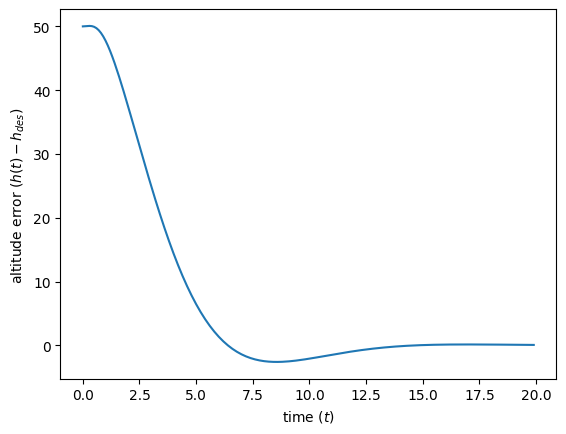

In [8]:
evaluation_timesteps = np.arange(0,20, 0.1)

system_response = simulate_system(x_0, evaluation_timesteps, D, V)
plt.plot(evaluation_timesteps, system_response[:,-1])
plt.xlabel('time ($t$)')
plt.ylabel(r'altitude error ($h(t) - h_{des}$) ')

We see a warning about the use of complex values, but the simulation otherwise seems to work. The next chapter will show us how to overcome this warning, but we won't worry about it now. Now our altitude is converging much faster to the desired value. However, we see an interesting behavior where the altitude first overshoots the desired point, then slowly sinks back. This behavior is due to the complex eigenvalues!

While we reach the target altitude much more quickly in this situation, we have a bit of a bumpier ride. As a passenger, which would you prefer? In ESE 5000, you will learn much more about how to design feedback controllers, and you can come up with designs that still quickly steer the system to the desired state, but limit the overshooting phenomenon seen in the above plot. 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/05_Ch_6_Eigenvalues_and_Eigenvectors/079-Longitudinal_Dynamics.ipynb)

[2i2c]: https://2i2c.org/
[curvenote]: https://curvenote.com
[docutils]: https://docutils.sourceforge.io/
[executablebooks]: https://executablebooks.org/
[jupyterbook]: https://jupyterbook.org/
[jupyterlab-myst]: https://github.com/executablebooks/jupyterlab-myst
[sphinx]: https://www.sphinx-doc.org/